# Marketing Campaign Effectiveness Analysis

## 1.Problem Statement



*  This project aims to understand how a customer’s response to marketing campaigns is influenced by various factors such as age, income, education level, marital status, spending behavior, and past campaign interactions.





## 2.Data Collection



*  Dataset Source:https://www.kaggle.com/datasets/rodsaldanha/arketing-campaign/data
*  The data consists of 29 columns and 2240 rows.



## 3.Dataset Information



*  ID: Unique customer ID
*  Year_Birth: Year the customer was born
*  Education: Education Level(e.g.,Graduation, PhD)
*  Marital_Status: Marital status(e.g.,Single, Married)

*  Income: Yearly income of the customer

*  Kidhome: Number of children in household

*  Teenhome: Number of teenagers in household

*  Dt_Customer: Date of customer's enrollment
*   Recency: Days since last purchase

*   MntWines, MntFruits, MntMeatProducts etc.: Amount spent on varios product types

*   NumDealsPurchases: Number of purchases made with a discount

*   NumWebPurchases: Purchases made through the company’s website

*   NumCatalogPurchases: Purchases made using a catalog

*   NumStorePurchases: Purchases made in store

*  NumWebVisitsMonth: Website visits in the last month
*  AcceptedCmp1 to AcceptedCmp5: Whether the customer accepted past campaigns


*  Response: Whether they accepted the last campaign (1 = Yes, 0 = No)


*  Complain: Whether the customer has complained









In [2]:
#Importing libraries
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Collection, Exploration, Cleaning and Transformation

In [3]:
#Loading the dataset
df = pd.read_csv('marketing_campaign.csv', sep = ';')

In [4]:
#Loading top 5 data
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
#datatypes of the columns
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [8]:
#Information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [9]:
#missing values
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


# Observation


* The dataset has missing values.



In [10]:
#Statistical description of the dataframe
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274


# Observation


* From the above description of numerical data, all means are not close to each other.
* Most of them have minimum of 0.


* There is outliners in the column.







In [11]:
df.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,2013-07-10 10:01:42.857142784,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,2013-01-16 00:00:00,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,2013-07-08 12:00:00,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,2013-12-30 06:00:00,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,NaN,NaN,666666.000000,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1493.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [12]:
#rows and columns
df.shape

(2240, 29)

In [13]:
#dropping null values
df.dropna(inplace = True)

In [14]:

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [15]:

df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2235,False
2236,False
2237,False
2238,False


In [16]:
#calculating total duplicated values
df.duplicated().sum()

np.int64(0)

# Insight or observation


* There are no duplicate values in the dataset.





In [17]:
#finding unique values
df.nunique()

,0
ID,2216
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,662
Recency,100
MntWines,776


In [18]:
#calculating null values
df.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


# Insight or observation


* There are no missing values.



In [19]:
[feature for feature in df.columns]

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [20]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [21]:
numerical_feature

['ID',
 'Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [22]:
categorical_feature

['Education', 'Marital_Status']

# Handling Outliers

In [23]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include='number')

In [24]:
# Detect outliers using IQR
outliers = pd.DataFrame()

In [25]:

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers[col] = ~df[col].between(lower, upper)

In [26]:
# Show rows with any outliers
rows_with_outliers = df[outliers.any(axis=1)]
print(rows_with_outliers)

         ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
0      5524        1957  Graduation         Single   58138.0        0   
8      4855        1974         PhD       Together   30351.0        1   
9      5899        1950         PhD       Together    5648.0        1   
12     2125        1959  Graduation       Divorced   63033.0        0   
15     2114        1946         PhD         Single   82800.0        0   
...     ...         ...         ...            ...       ...      ...   
2233   9432        1977  Graduation       Together  666666.0        1   
2235  10870        1967  Graduation        Married   61223.0        0   
2236   4001        1946         PhD       Together   64014.0        2   
2237   7270        1981  Graduation       Divorced   56981.0        0   
2239   9405        1954         PhD        Married   52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...

In [27]:
# IQR method to remove outliers
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

numeric_cols = df.select_dtypes(include='number').columns
df_clean = remove_outliers_iqr(df, numeric_cols)

In [28]:
df_clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
11,387,1976,Basic,Married,7500.0,0,0,2012-11-13,59,6,...,8,0,0,0,0,0,0,3,11,0
13,8180,1952,Master,Divorced,59354.0,1,1,2013-11-15,53,233,...,6,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,10659,1979,2n Cycle,Together,7500.0,1,0,2013-05-07,7,2,...,7,0,0,0,0,0,0,3,11,0
2223,1448,1963,Master,Married,33562.0,1,2,2014-06-25,33,21,...,4,0,0,0,0,0,0,3,11,0
2229,10084,1972,Graduation,Married,24434.0,2,0,2014-05-18,9,3,...,7,0,0,0,0,0,0,3,11,0
2232,8080,1986,Graduation,Single,26816.0,0,0,2012-08-17,50,5,...,4,0,0,0,0,0,0,3,11,0


In [29]:

df_clean.shape

(828, 29)

In [30]:
df['Response_Rate']=df['Response']*100

In [31]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Response_Rate
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,100
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,0,3,11,0,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,0,0,0,1,0,0,3,11,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,1,0,0,0,0,3,11,0,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,0,3,11,0,0


In [32]:
# Step 1: Compute IQR for 'Response_Rate'
Q1 = df['Response_Rate'].quantile(0.25)
Q3 = df['Response_Rate'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out the outliers
df_cleaned = df[(df['Response_Rate'] >= lower_bound) & (df['Response_Rate'] <= upper_bound)]

# Step 4: Compare shapes
print("Original shape:", df.shape)
print("After removing outliers from 'Response_Rate':", df_cleaned.shape)

Original shape: (2216, 30)
After removing outliers from 'Response_Rate': (1883, 30)


In [33]:
df['Response_Rate'].describe()

,Response_Rate
count,2216.000000
mean,15.027076
std,35.741727
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,100.000000


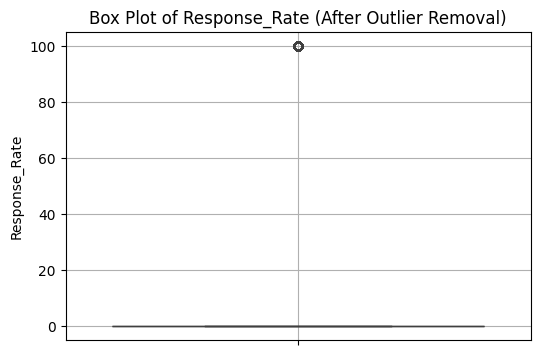

In [34]:
#Boxplot for Response_Rate for uncleaned data
plt.figure(figsize=(6, 4))
sns.boxplot(y=df['Response_Rate'])
plt.title('Box Plot of Response_Rate (After Outlier Removal)')
plt.grid(True)
plt.show()

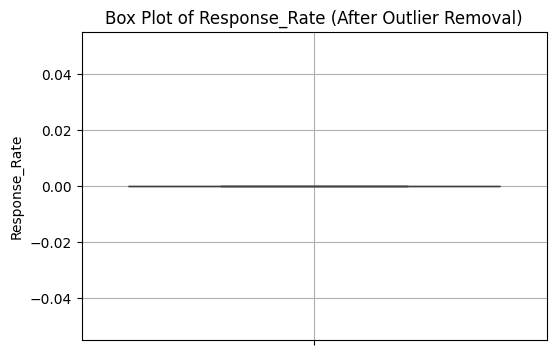

In [35]:
#Boxplot Response_Rate for cleaned data
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_cleaned['Response_Rate'])
plt.title('Box Plot of Response_Rate (After Outlier Removal)')
plt.grid(True)
plt.show()

# Data Transformation

## Data Encoding

In [36]:
#creating instance of OneHotEncoder
ohe = OneHotEncoder()

In [37]:
ohe.fit_transform(df[['Marital_Status']])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2216 stored elements and shape (2216, 8)>

In [38]:
ohe.fit_transform(df[['Marital_Status']]).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
# fit the encoder to the dataframe and transform the categorical variable
encoded = ohe.fit_transform(df[['Marital_Status']]).toarray()

In [40]:
encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
#converting to the dataframe
encoded_df = pd.DataFrame(
    encoded,
    columns = ohe.get_feature_names_out(['Marital_Status'])
)

In [42]:
encoded_df

,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
2211,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2212,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2213,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2214,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
df['Marital_Status']

,Marital_Status
0,Single
1,Single
2,Together
3,Together
4,Married
...,...
2235,Married
2236,Together
2237,Divorced
2238,Together


In [44]:
#concatenation
pd.concat([df['Marital_Status'], encoded_df], axis =1)

,Marital_Status,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,Single,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Single,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Together,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Together,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Married,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2061,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2078,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2079,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2081,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [45]:
encoder = OneHotEncoder()

In [46]:
encoder.fit_transform(df[['Education']])

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2216 stored elements and shape (2216, 5)>

In [47]:
encoder.fit_transform(df[['Education']]).toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [48]:
encoded = encoder.fit_transform(df[['Education']]).toarray()

In [49]:
#converting to the dataframe
encoded_df = pd.DataFrame(
    encoded,
    columns = encoder.get_feature_names_out(['Education'])
)

In [50]:
encoded_df

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
2211,0.0,0.0,1.0,0.0,0.0
2212,0.0,0.0,0.0,0.0,1.0
2213,0.0,0.0,1.0,0.0,0.0
2214,0.0,0.0,0.0,1.0,0.0


In [51]:
#concatenation
pd.concat([df['Education'], encoded_df], axis =1)

,Education,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,Graduation,0.0,0.0,1.0,0.0,0.0
1,Graduation,0.0,0.0,1.0,0.0,0.0
2,Graduation,0.0,0.0,1.0,0.0,0.0
3,Graduation,0.0,0.0,1.0,0.0,0.0
4,PhD,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
2061,NaN,0.0,0.0,1.0,0.0,0.0
2078,NaN,0.0,0.0,0.0,0.0,1.0
2079,NaN,1.0,0.0,0.0,0.0,0.0
2081,NaN,0.0,1.0,0.0,0.0,0.0


## Normalization


In [52]:
spend = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]


In [53]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Scale selected columns
df_normalized = df.copy()
df_normalized[spend] = scaler.fit_transform(df[spend])

# Preview scaled values
print(df_normalized[spend].head(10))

   MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0  0.425318   0.442211         0.316522         0.664093          0.335878   
1  0.007368   0.005025         0.003478         0.007722          0.003817   
2  0.285332   0.246231         0.073623         0.428571          0.080153   
3  0.007368   0.020101         0.011594         0.038610          0.011450   
4  0.115874   0.216080         0.068406         0.177606          0.103053   
5  0.348292   0.211055         0.056812         0.000000          0.160305   
6  0.157401   0.326633         0.095072         0.193050          0.187023   
7  0.050904   0.050251         0.032464         0.011583          0.003817   
8  0.009377   0.000000         0.013913         0.011583          0.011450   
9  0.018754   0.000000         0.003478         0.003861          0.003817   

   MntGoldProds  
0      0.274143  
1      0.018692  
2      0.130841  
3      0.015576  
4      0.046729  
5      0.043614  
6      0.084112

## Age

In [54]:
df['Year_Birth']=df['Year_Birth'].astype(int)

In [55]:
#calculating current time
current_year = datetime.now().year
current_year

2025

In [56]:
#calculating age
df['Age'] = current_year - df['Year_Birth']


In [57]:

df['Age']

,Age
0,68
1,71
2,60
3,41
4,44
...,...
2235,58
2236,79
2237,44
2238,69


In [58]:
def eductation_level(education):
    if education in ['Graduation', 'PhD', 'Master'] :
        return 'High'
    elif education in ['Basic'] :
        return 'Middle'
    else :
        return 'Low'

In [59]:
df['Education_level'] = df['Education'].apply(eductation_level)

In [60]:
df['Education_level']

,Education_level
0,High
1,High
2,High
3,High
4,High
...,...
2235,High
2236,High
2237,High
2238,High


## Total Accepted Campaigns

In [61]:
df['Total_Accepted'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3']
+ df['AcceptedCmp4'] + df['AcceptedCmp5']

,0
0,0
1,0
2,0
3,0
4,0
...,...
2235,0
2236,0
2237,1
2238,0


In [62]:
df['Total_Accepted']

,Total_Accepted
0,0
1,0
2,0
3,0
4,0
...,...
2235,0
2236,1
2237,0
2238,0


## Total Spent on Products

In [63]:
df['Total_spent'] = df[['MntWines', 'MntFruits','MntMeatProducts',
'MntFishProducts', 'MntSweetProducts','MntGoldProds']].sum(axis = 1)

In [64]:
df['Total_spent']

,Total_spent
0,1617
1,27
2,776
3,53
4,422
...,...
2235,1341
2236,444
2237,1241
2238,843


## Removing irrelevant columns

In [65]:
to_drop = ['Z_CostContact', 'Z_Revenue', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2']
df = df.drop(to_drop, axis=1)

In [66]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Response_Rate,Age,Education_level,Total_Accepted,Total_spent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,1,100,68,High,0,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,71,High,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,60,High,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,41,High,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,44,High,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,3,4,5,0,0,0,58,High,0,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,2,5,7,0,0,0,79,High,1,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,3,13,6,0,0,0,44,High,0,1241
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,5,10,3,0,0,0,69,High,0,843


# EDA

## Descriptive Statistics

In [75]:
# Calculating basic ROI as ratio of revenue (MntTotal) to income
df['ROI'] = df['Total_spent'] / df['Income']

# Handling divide-by-zero or missing incomes
df['ROI'].replace([float('inf'), -float('inf')], 0, inplace=True)
df['ROI'].fillna(0, inplace=True)

# ROI summary
print("ROI Summary:")
print(df['ROI'].describe())

ROI Summary:
count    2216.000000
mean        0.009912
std         0.016816
min         0.000039
25%         0.002346
50%         0.008005
75%         0.015533
max         0.706988
Name: ROI, dtype: float64


In [76]:
engagement_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

print("Engagement Statistics:")
print(df[engagement_cols].describe())

Engagement Statistics:
       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
count      2216.000000          2216.000000        2216.000000   
mean          4.085289             2.671029           5.800993   
std           2.740951             2.926734           3.250785   
min           0.000000             0.000000           0.000000   
25%           2.000000             0.000000           3.000000   
50%           4.000000             2.000000           5.000000   
75%           6.000000             4.000000           8.000000   
max          27.000000            28.000000          13.000000   

       NumWebVisitsMonth  
count        2216.000000  
mean            5.319043  
std             2.425359  
min             0.000000  
25%             3.000000  
50%             6.000000  
75%             7.000000  
max            20.000000  


## Visualization

In [69]:
df['Year_Birth'] = pd.to_datetime(df['Year_Birth'])

## Plotting campaign performance over time.

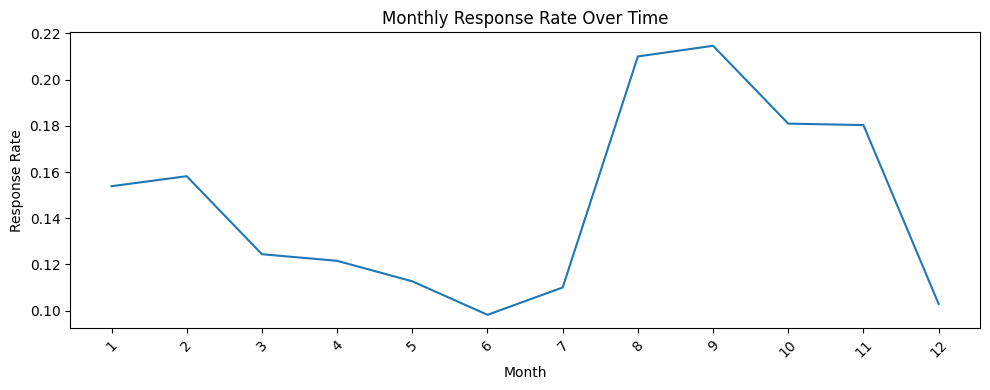

In [70]:
# Monthly response rate
df['Month'] = df['Dt_Customer'].dt.month
monthly_response = df.groupby('Month')['Response'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 4))
sns.lineplot(x=monthly_response['Month'].astype(str), y='Response', data=monthly_response)
plt.title("Monthly Response Rate Over Time")
plt.xlabel("Month")
plt.ylabel("Response Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Comparing conversion rates across marital status.

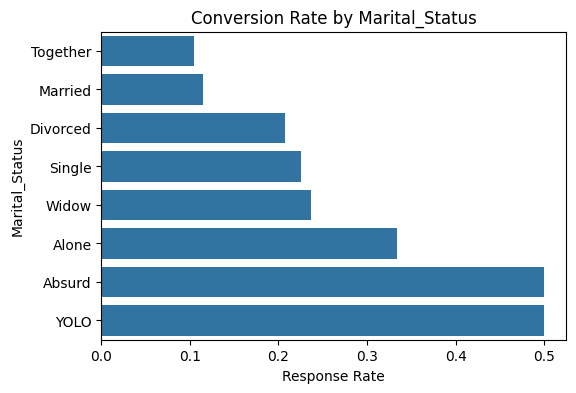

In [71]:
# Response rate by Marital_Status
marital_conversion = df.groupby('Marital_Status')['Response'].mean().sort_values()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=marital_conversion.values, y=marital_conversion.index)
plt.title("Conversion Rate by Marital_Status")
plt.xlabel("Response Rate")
plt.ylabel("Marital_Status")
plt.show()

## Creating heatmaps and correlation plots to understand feature interactions.

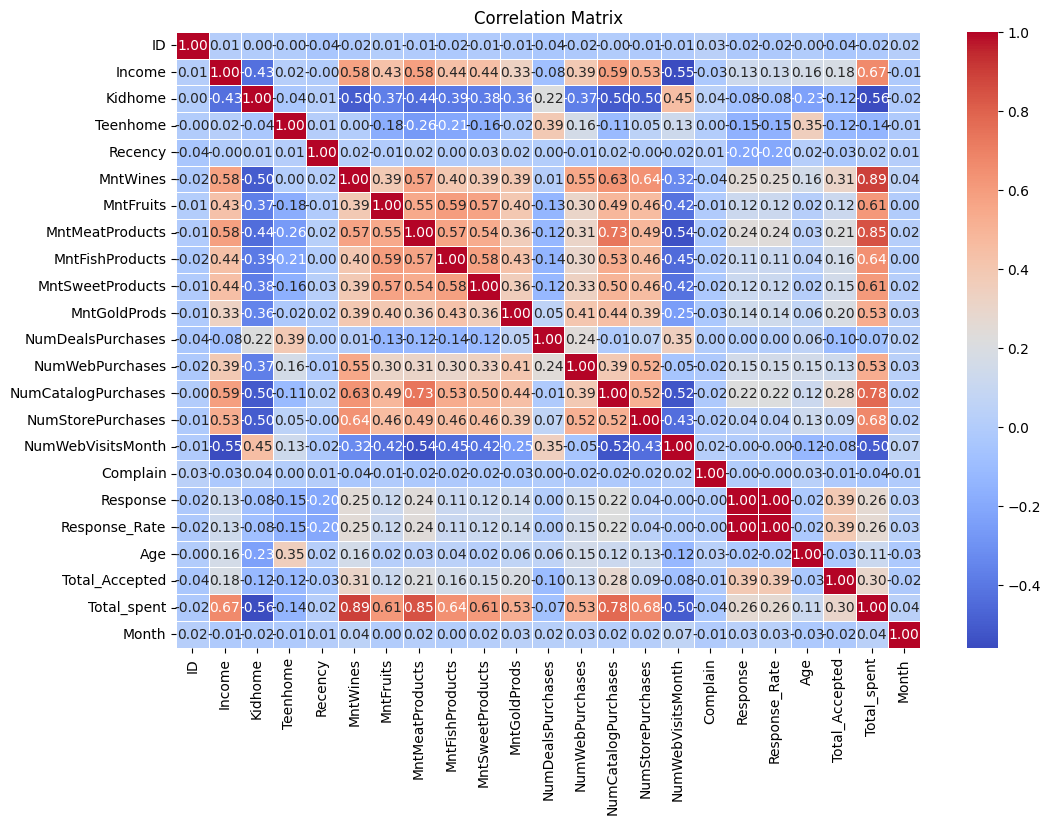

In [72]:
# Correlation plot of numeric columns
numeric_cols = df.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Visualizing top-performing and underperforming campaigns

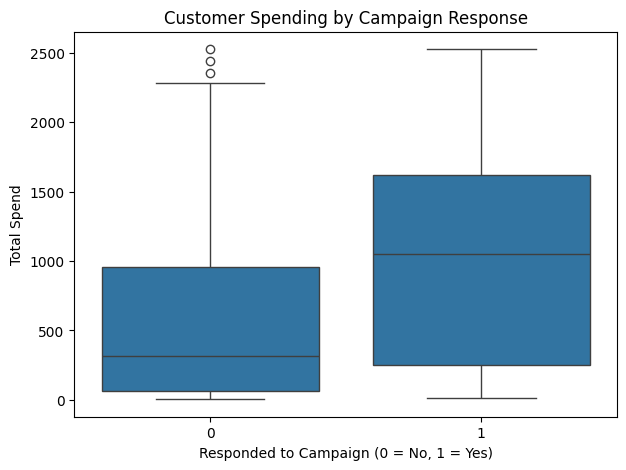

In [73]:
# Total spending vs response
df['MntTotal'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

plt.figure(figsize=(7, 5))
sns.boxplot(x='Response', y='MntTotal', data=df)
plt.title("Customer Spending by Campaign Response")
plt.xlabel("Responded to Campaign (0 = No, 1 = Yes)")
plt.ylabel("Total Spend")
plt.show()

## Key Insights



*   Younger customers tend to engage more with digital channels.

*  Customers with high web and catalog purchases are more likely to respond positively.

*  Store purchases showed lower correlation with campaign response.

*  Recency (days since last purchase) is negatively correlated with response.

*  Recently active customers are more likely to engage.

*   Dt_Customer shows that newer customers tend to respond better to campaigns.


# Strategic Recommendation

1.Target High-Value Segments:



*   Focus on younger, higher-income
customers with active online purchasing behavior.




2.Optimize Timing:

* Prioritize customers with recent purchases — retarget them soon after transactions.

3.Leverage High-Performing Channels:

* Emphasize web and catalog channels where engagement is stronger.

4.Personalize Based on History:

* Use past campaign response patterns (especially Campaigns 3 & 4) to build smarter segments.
